Import TensorFlow, matplotlib, MNIST dataset and visualisation of the handwritten number.

7


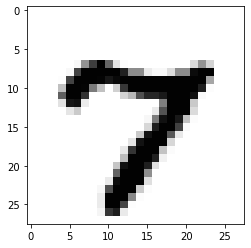

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
image_index = 5473
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

Size of the image.

In [21]:
x_train.shape

(60000, 28, 28)

Reshaping and Normalizing the Images.

In [22]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Building the Convolutional Neural Network

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Compiling and Fitting the Model.

In [24]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2087 - accuracy: 0.9375
Epoch 2/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0835 - accuracy: 0.9742
Epoch 3/25
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0583 - accuracy: 0.9818
Epoch 4/25
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0449 - accuracy: 0.9855
Epoch 5/25
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0348 - accuracy: 0.9886
Epoch 6/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0287 - accuracy: 0.9904
Epoch 7/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0231 - accuracy: 0.9922
Epoch 8/25
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0222 - accuracy: 0.9924
Epoch 9/25
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0207 - accuracy: 0.9926
Epoch 10/25
1875/1875 [==============================] - 15s 8ms/step - l

Evaluating the Model.

In [25]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0807 - accuracy: 0.9865


[0.08065182715654373, 0.9865000247955322]

Here we can see that we have acheived 98.65% accuracy.